In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#modelling 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings

In [48]:
rawdf = pd.read_csv('data/stud.csv')
rawdf.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [49]:
dependentFeatures = rawdf.drop(columns=['math_score'],axis=1)
dependentFeatures.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [50]:
y = rawdf['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [51]:
numfeatures = dependentFeatures.select_dtypes(exclude="object").columns
catfeatures = dependentFeatures.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ohTransformer = OneHotEncoder()
standScaler = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ('OneHotEnocder', ohTransformer, catfeatures),
        ('StandardScaler', standScaler, numfeatures),
    ])

>after transforming the data in columns now we fit the data into the preprocessor

In [52]:
X = preprocessor.fit_transform(dependentFeatures)
X.shape

(1000, 19)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
X_train.shape, X_test.shape

((800, 19), (200, 19))

>creating and evaluation method to calculate all metrics at once

In [54]:
def evaluatemethod(true, predicted):
    mae = mean_absolute_error(true,predicted)
    r2 = r2_score(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    return mae,rmse,r2

In [55]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluatemethod(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluatemethod(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.4358
- Mean Absolute Error: 4.3398
- R2 Score: 0.8689
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.0869
- Mean Absolute Error: 3.9866
- R2 Score: 0.8946


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.6245
- Mean Absolute Error: 5.2418
- R2 Score: 0.8053
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4650
- Mean Absolute Error: 5.0935
- R2 Score: 0.8297


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.4001
- Mean Absolute Error: 4.3195
- R2 Score: 0.8706
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.0657
- Mean Absolute Error: 3.9876
- R2 Score: 0.8954


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.9096
- Mean Absolute Error: 4.6985
- R2 Score: 0.8450
-----------------------

In [56]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.895447
0,Linear Regression,0.894570
7,CatBoosting Regressor,0.876273
5,Random Forest Regressor,0.854783
8,AdaBoost Regressor,0.845361
6,XGBRegressor,0.836210
1,Lasso,0.829706
3,K-Neighbors Regressor,0.805870
4,Decision Tree,0.750708


In [57]:

lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 89.46


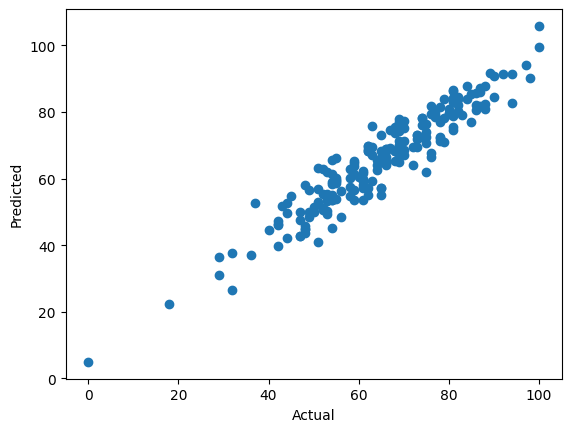

In [58]:

plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

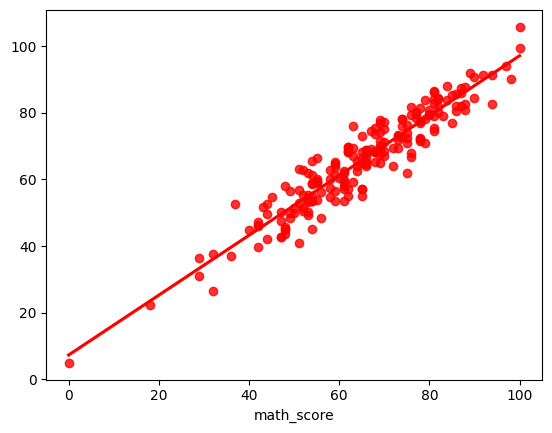

In [59]:

sb.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [60]:

pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
507,55,59.3125,-4.3125
818,60,60.5000,-0.5000
452,65,65.0625,-0.0625
368,44,49.5625,-5.5625
242,56,48.3750,7.6250
...,...,...,...
430,64,64.1250,-0.1250
874,43,51.6875,-8.6875
550,79,71.0000,8.0000
608,61,61.8125,-0.8125
